<a href="https://colab.research.google.com/github/ArthurMN/IC-TRAB-1/blob/main/IC_TRAB1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1
Construa um programa baseado em lógica fuzzy (inferência de Mamdani) conforme as regras disponibilizadas no Exercício 18 do livro “Inteligência Computacional Aplicada à Administração, Economia e Engenharia em Matlab”, Hime Aguiar e Oliveira Junior (Coordenadores), Caldeira, A. M.; Machado, M. A. S.; Sousa, R. C.; Tanscheit, R.; Thomson Learning, 2007. O programa deverá solicitar as entradas ao usuário e exibir a saída produzida.




# Metodologia
Para a resolução do problema foram utilizadas as bibliotecas matplotlib, numpy, e math.

# Funções de pertinência
Funções que modelaram os dados de entrada em três niveis diferentes, **baixo**, **medio**, **alto**. A função gaussiana modelara as duas entradas, enquanto a triangular modela a saída.


Função Gaussiana:
\begin{align}
        \mathbf f(x) = \frac {1}{σ(2π)^{1/2}}*e^{\frac{1}{2}(\frac{(x - µ)}{2σ})^2}
    \end{align}

Função Triangular:

\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        0 & a > x \\
        \frac {x-a}{b-a} & a < x \le b\\
        \frac {c-x}{c-b} & b < x < c \\
        0 & c \le x.
        \end{array}
        \right.
    \end{align}

# Regras de inferência

**Regra 1**: Se a temperatura é baixa e o preço é baixo, então o consumo é grande.

**Regra 2**: Se a temperatura é baixa e o preço é médio, então o consumo é médio.

**Regra 3**: Se a temperatura é baixa e o preço é alto, então o consumo é pequeno.

**Regra 4**: Se a temperatura é média e o preço é baixo, então o consumo é grande.

**Regra 5**: Se a temperatura é média e o preço é médio, então o consumo é médio.

**Regra 6**: Se a temperatura é média e o preço é alto, então o consumo é pequeno.

**Regra 7**: Se a temperatura é alta e o preço é baixo, então o consumo é grande.

**Regra 8**: Se a temperatura é alta e o preço é médio, então o consumo é médio.

**Regra 9**: Se a temperatura é alta e o preço é alto, então o consumo é pequeno.

Após a aplicação das regras de inferência a saída fuzzyficada é o máximo dos valores obtidos.

# Desfuzzyficação
Agora basta desfuzzyficar a saída. O processo é feito pela a obtenção da área sombreada na figura, determinada pelo centroide calculado como,
\begin{align}
        \mathbf C = \frac {\sum_{} P_a(x)x}{\sum_{} P_a(x)}.
    \end{align}
em que PA(x) é a função de pertinência.

Insira a temperatura ambiente [15,45]: 30
Insira o preço unitário [1,6]: 3.5
Output 3250.0270315446596


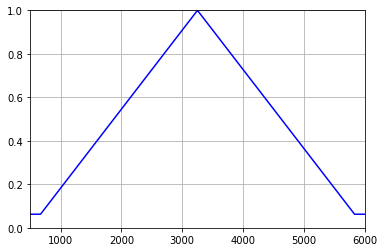

In [2]:
#Importação das blibliotecas utilizadas
import matplotlib.pyplot as plt
import numpy as np
import math
'''-------------------------- FUNÇÕES DE PERTINENCIA - INICIO --------------------------------------'''
def gaussian(x, dp, m):
    return math.exp(-(x-m)**2/(2*dp**2))

def triangular(a,b,c,x):
  if(x <= a):
    return 0
  if( a < x and x <= b):
    return (x-a)/(b-a)
  if(b < x and x < c):
    return (c-x)/(c-b)
  if(x >= c):
    return 0

def t_baixo(x):
  return gaussian(x, 6.369, 15)
def t_medio(x):
  return gaussian(x, 6.369, 30)
def t_alto(x):
  return gaussian(x, 6.369, 45)

def p_baixo(x):
  return gaussian(x, 1.061, 1)
def p_medio(x):
  return gaussian(x, 1.061, 3.5)
def p_alto(x):
  return gaussian(x, 1.061, 6)


def c_baixo(x):
  return triangular(-2250, 500, 3250, x)
def c_medio(x):
  return triangular(500, 3250, 6000, x)
def c_alto(x):
  return triangular(3250, 6000, 8750, x)
'''----------------------- FUNÇÕES DE PERTINENCIA - FIM --------------------------------------'''


'''----------------------- SOLICITAÇÃO DE ENTRADAS - INICIO ----------------------------------'''
#Solicita as entradas garantido que as mesmas estão no intervalo devido
while True:
  temperatura = float(input('Insira a temperatura ambiente [15,45]: '))
  if(15<= temperatura <= 45):
    break;
  else:
    print('Valor invalido, por favor insira uma temperatura no intervalo [15,45]')

while True:
  preco_unitario = float(input('Insira o preço unitário [1,6]: '))
  if(1<= preco_unitario <= 6):
    break;
  else:
    print('Valor invalido, por favor insira um preco unitario no intervalo [1,6]')

'''----------------------- SOLICITAÇÃO DE ENTRADAS - FIM ----------------------------------'''


'''-------------------------------- REGRAS - INICIO ------------------------------------------'''

#Se temperatura pequena e preço alto
c_pequeno_1 = min(t_baixo(temperatura), p_alto(preco_unitario))
#Se temperatura alta e preço alto
c_pequeno_2 = min(t_alto(temperatura), p_alto(preco_unitario))
#Se temperatura media e preço alto
c_pequeno_3 = min(t_medio(temperatura), p_alto(preco_unitario))
#Se temperatura baixa e preço medio
c_medio_1 = min(t_baixo(temperatura), p_medio(preco_unitario))
#Se temperatura media e preço medio
c_medio_2 = min(t_medio(temperatura), p_medio(preco_unitario))
#Se temperatura alta e preço medio
c_medio_3 = min(t_alto(temperatura), p_medio(preco_unitario))
#Se temperatura baixa e preço baixo
c_alto_1 = min(t_baixo(temperatura), p_baixo(preco_unitario))
#Se temperatura media e preço baixo
c_alto_2 = min(t_medio(temperatura), p_baixo(preco_unitario))
#Se temperatura alta e preço medio
c_alto_3 = min(t_alto(temperatura), p_medio(preco_unitario))

#Se Temperatura baixa e preço baixo, então consumo alto
def regra_1(x):
  return min(c_alto_1, c_alto(x))

#Se Temperatura baixa e preço medio, então consumo medio
def regra_2(x):
  return min(c_medio_1, c_medio(x))

#Se Temperatura baixa e preço alto, então consumo pequeno
def regra_3(x):
  return min(c_pequeno_1, c_baixo(x))

#Se Temperatura media e preço baixo, então consumo alto
def regra_4(x):
  return min(c_alto_3, c_alto(x))

#Se Temperatura media e preço medio, então consumo medio
def regra_5(x):
  return min(c_medio_2, c_medio(x))

#Se Temperatura media e preço alto, então consumo baixo
def regra_6(x):
  return min(c_pequeno_2, c_baixo(x))

#Se Temperatura alta e preço medio, então consumo alto
def regra_7(x):
  return min(c_alto_2, c_alto(x))

#Se Temperatura alta e preço medio, então consumo medio
def regra_8(x):
  return min(c_medio_3, c_medio(x))

#Se Temperatura alta e preço alto, então consumo baixo
def regra_9(x):
  return min(c_pequeno_3, c_baixo(x))

'''-------------------------------- REGRAS - FIM ------------------------------------------'''


#Saída fuzzificada
def OutFuzzy(x):
  return max([regra_1(x), regra_2(x), regra_3(x), regra_4(x), regra_5(x), regra_6(x), regra_7(x), regra_8(x), regra_9(x)])

'''---------------------------- DEFUZZYFICAÇÃO - INICIO ------------------------------------'''
#Desfuzzyficação por meio do cálculo do centroide
a = np.arange(500, 6000.1, 0.5)
b = np.array([])
n = 0
d = 0
for i in a:
    b = np.append(b, OutFuzzy(i))
    n = n + i*OutFuzzy(i)
    d = d + OutFuzzy(i)
out = n/d
'''---------------------------- DEFUZZYFICAÇÃO - FIM ------------------------------------'''

print('Output',out)
plt.plot(a,b, color ='b')
plt.xlim(500,6000)
plt.grid()
plt.show()